In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

In [24]:
# Load the diabetes dataset
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


In [26]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
Pedigree,float64
Age,int64
Outcome,int64


In [27]:
# Separate features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# Initialize the KNN classifier with k=5 (for example)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [30]:
# Predict on the test set
y_pred = knn.predict(X_test)


In [31]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[79 20]
 [27 28]]


<Axes: >

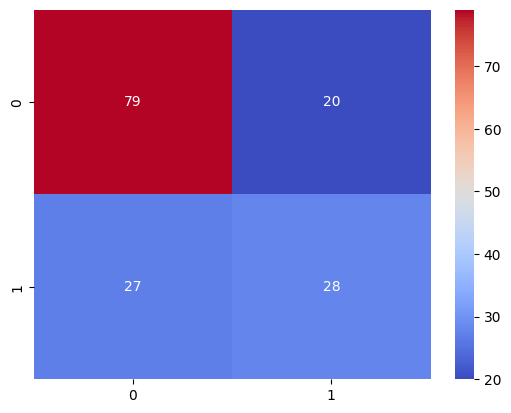

In [32]:
sns.heatmap(conf_matrix,annot=True,cmap='coolwarm')

In [33]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6948


In [34]:
# Error Rate
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")


Error Rate: 0.3052


In [35]:
# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")


Precision: 0.5833


In [36]:
# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


Recall: 0.5091
